In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('./datasets/Books.csv', low_memory=False)
users = pd.read_csv("./datasets/Users.csv")
ratings = pd.read_csv("./datasets/Ratings.csv")
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [4]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [5]:
books.duplicated().sum()

0

In [6]:
# Filter rows with any null values
null_rows = books[books.isnull().any(axis=1)]

#Display the rows with null values
print(null_rows)

              ISBN                                         Book-Title   
118033  0751352497                           A+ Quiz Masters:01 Earth  \
128890  193169656X                                        Tyrant Moon   
129037  1931696993                                    Finders Keepers   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

            Book-Author Year-Of-Publication   
118033              NaN                1999  \
128890  Elaine Corvidae                2002   
129037  Linnea Sinclair                2001   
187689              NaN                1995   
209538             2000   DK Publishing Inc   
220731             2003           Gallimard   
221678             2000   DK Publishing Inc   

                                      

In [7]:
# Drops URL fields
books.drop(columns=['Image-URL-S'], inplace=True)
books.drop(columns=['Image-URL-L'], inplace=True)
#books.drop(columns=['Image-URL-M'], inplace=True)


In [8]:
# Since we have 2 null values we can fix it mannualy.

# adding missign authors
books.iloc[187689]['Book-Author'] = 'Downes, Larissa Anne'
books.iloc[118033]['Book-Author'] = 'Bob'

# adding missing publishers
books.iloc[129037]['Publisher'] = 'CreateSpace Independent Publishing Platform'
books.iloc[128890]['Publisher'] = 'NovelBooks, Inc'


books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-M            0
dtype: int64

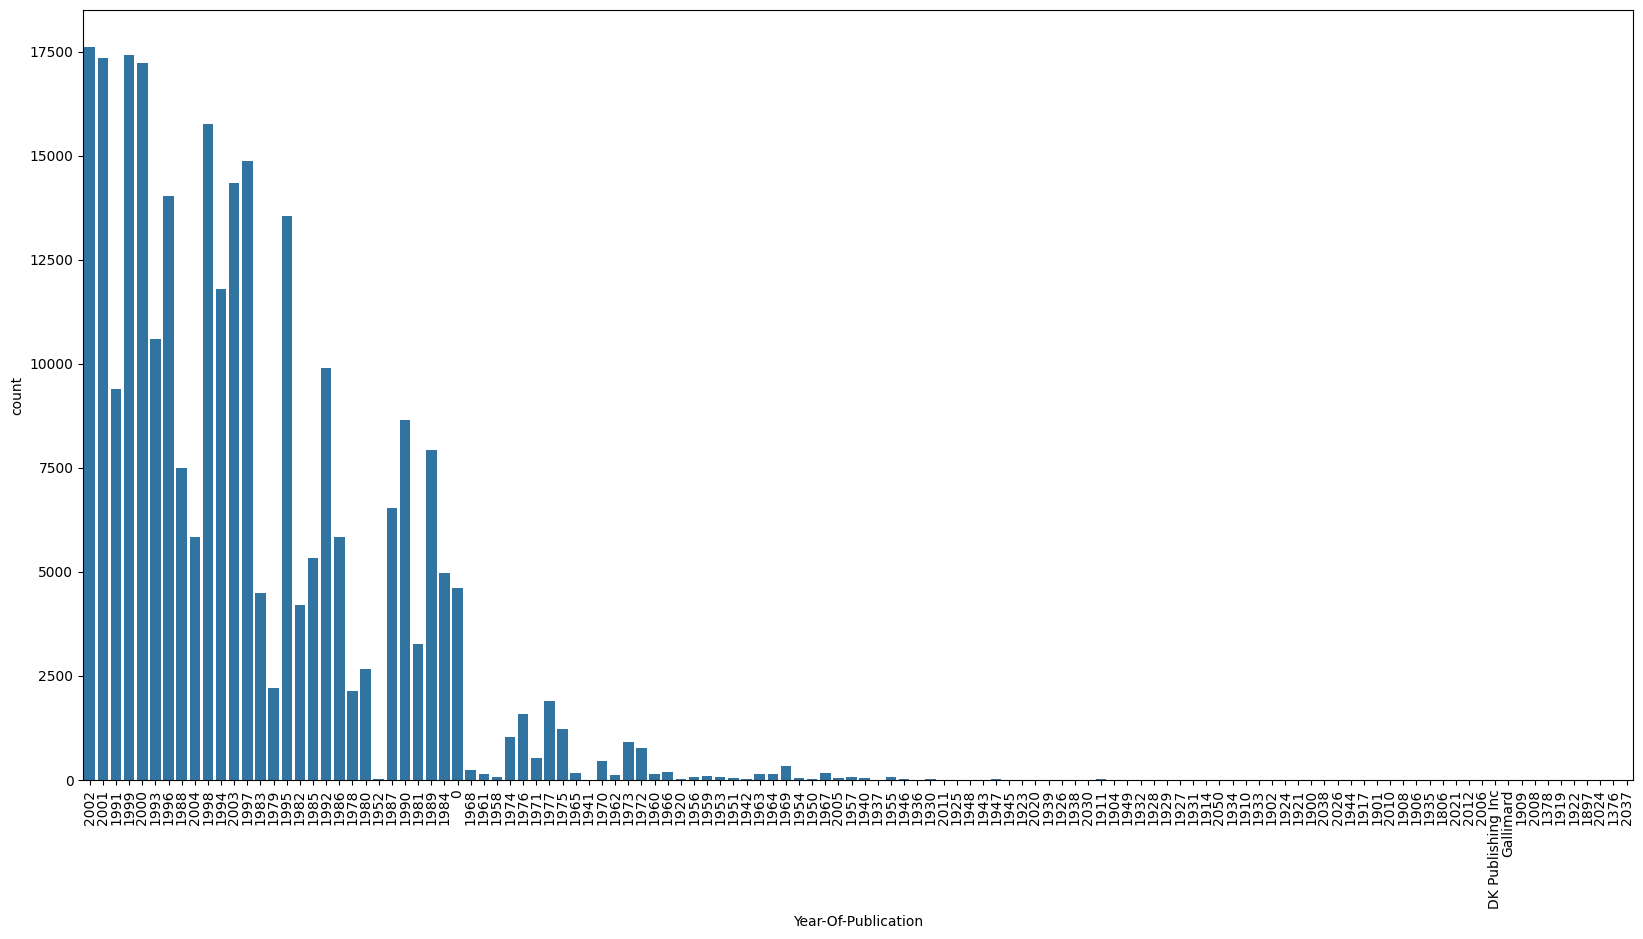

In [9]:
# Book's publishing year.
plt.figure(figsize=(20,10))
sns.countplot(x=books['Year-Of-Publication'])
plt.xticks(rotation=90)
plt.show()

In [10]:
users = pd.read_csv("./datasets/Users.csv")
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [13]:
users.duplicated().sum()

0

<Axes: xlabel='Location'>

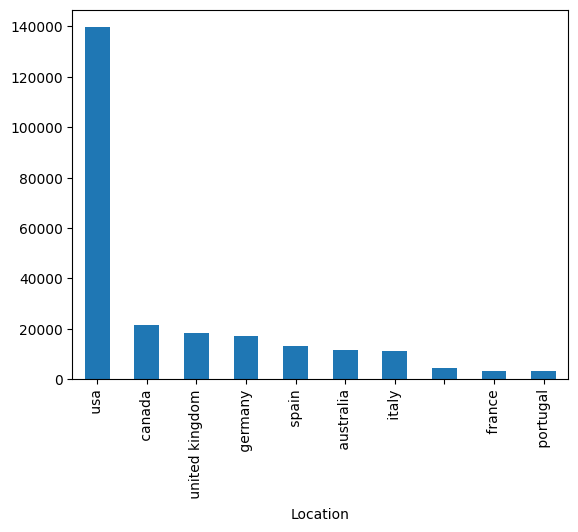

In [14]:
# users location
users['Location'] = users['Location'].apply(lambda x:x.split(',')[-1])
users['Location'].value_counts().head(10).plot(kind='bar')

In [15]:
# Since there is lot of null values in "Age". It would cause bias in the model. 
# So its ideal to drop the column for more consistent model and data.
users.drop(columns=['Age'], inplace=True)

In [16]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [18]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [19]:
ratings.duplicated().sum()

0

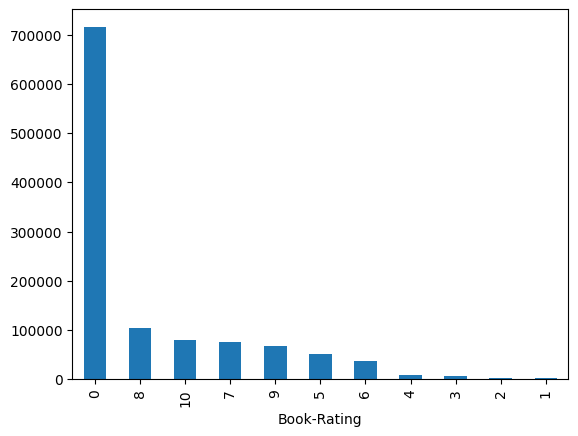

In [20]:
# count of ratings
ratings['Book-Rating'].value_counts().plot(kind='bar');

In [21]:
print('Books:',books.shape)
print('Ratings:',ratings.shape)
print('Users:',users.shape)

Books: (271360, 6)
Ratings: (1149780, 3)
Users: (278858, 2)


In [22]:
ratings_with_name = ratings.merge(books, on='ISBN')
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...


In [33]:
ratings_with_name.describe()

,User-ID,Book-Rating
count,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00
std,8.052466e+04,3.854157e+00
min,2.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00
50%,1.412100e+05,0.000000e+00
75%,2.114260e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


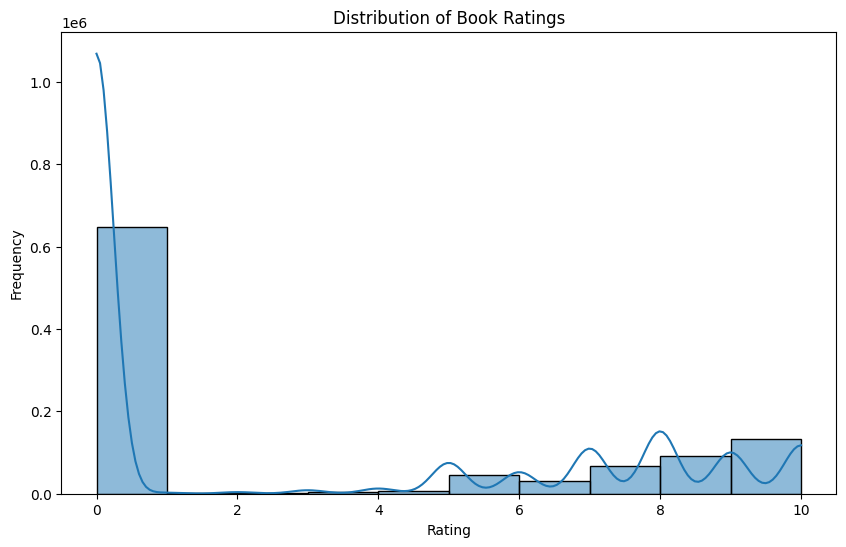

In [35]:
# 1. Distribution of Book Ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings_with_name['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

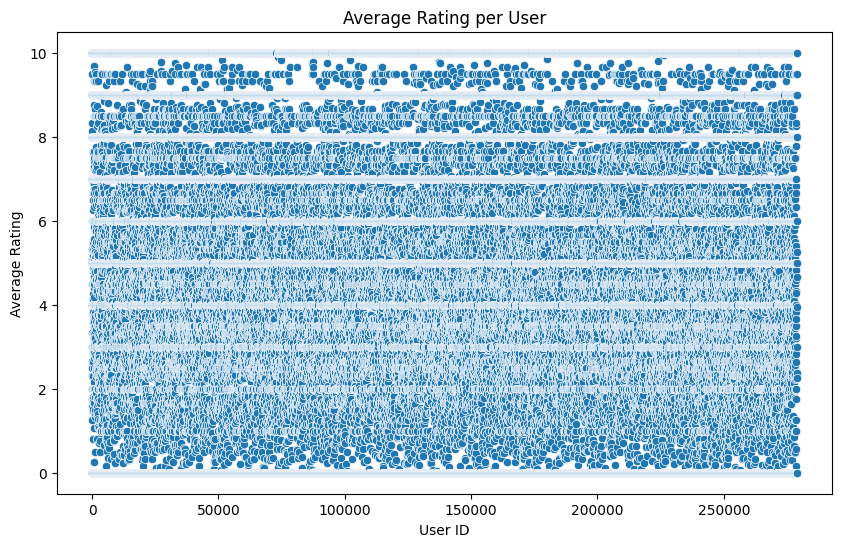

In [36]:
# 2. Average Rating per User
average_ratings_per_user = ratings_with_name.groupby('User-ID')['Book-Rating'].mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=average_ratings_per_user.index, y=average_ratings_per_user.values)
plt.title('Average Rating per User')
plt.xlabel('User ID')
plt.ylabel('Average Rating')
plt.show()

/var/folders/pt/gn0lj_h95ygf12jxp8ct7mhr0000gn/T/ipykernel_12051/1296175291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.values, y=top_books.index, palette='viridis')


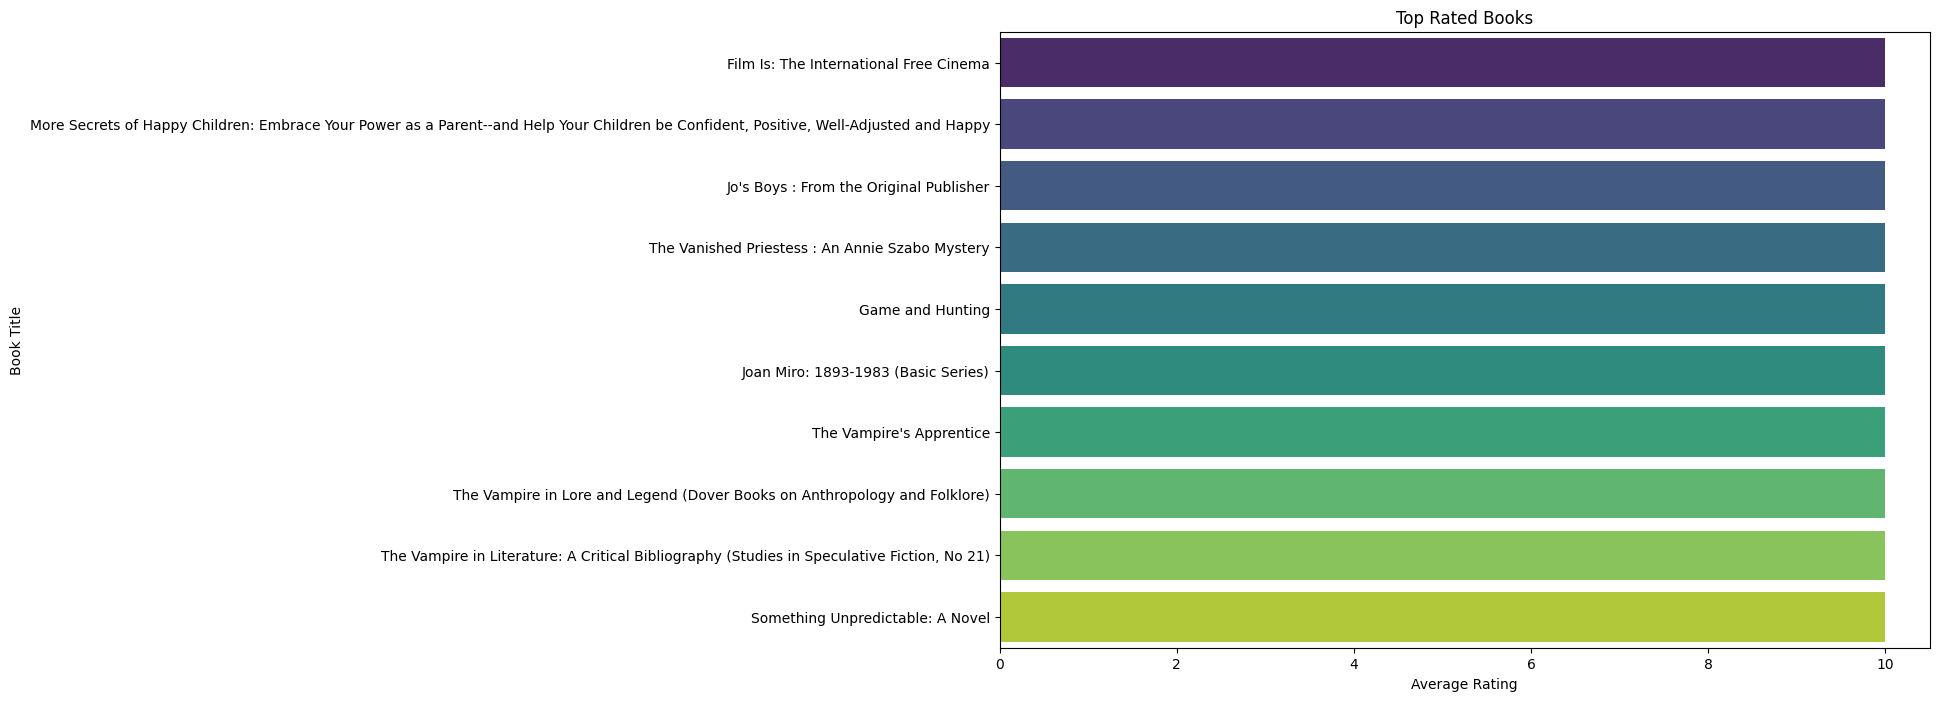

In [40]:
# 3. Top Rated Books
average_ratings_per_book = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False)
top_books = average_ratings_per_book.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_books.values, y=top_books.index, palette='viridis')
plt.title('Top Rated Books')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

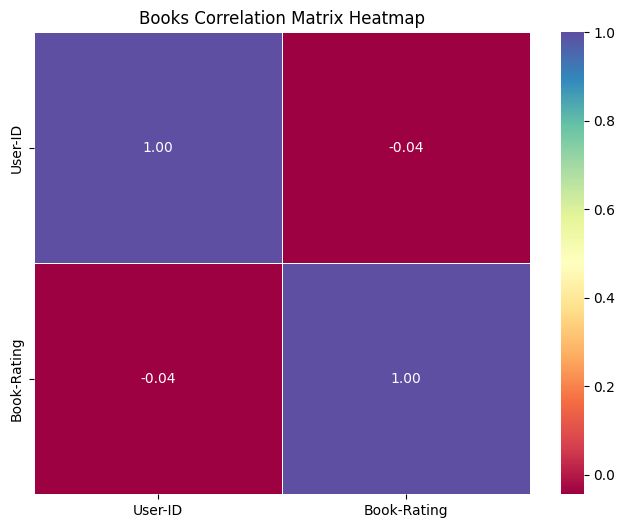

In [34]:
# Box plot of Books dataset
# Selecting only numeric columns for the correlation matrix
numeric_cols = ratings_with_name.select_dtypes(include=['float64', 'int64'])
# Computing the correlation matrix
corr_matrix = numeric_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f', linewidths=.5)
plt.title('Books Correlation Matrix Heatmap')
plt.show()

In [24]:
# Merges the ratings with book details and filters users who have rated more than 
# 50 books and books rated at least 10 times.

# Filter users who have rated more than 50 books
user_ratings_count = ratings_with_name.groupby('User-ID').count()['Book-Rating']
active_users = user_ratings_count[user_ratings_count > 50].index
filtered_ratings = ratings_with_name[ratings_with_name['User-ID'].isin(active_users)]

# Filter books that have been rated at least 10 times
book_ratings_count = filtered_ratings.groupby('Book-Title').count()['Book-Rating']
popular_books = book_ratings_count[book_ratings_count >= 10].index
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(popular_books)]


# this data filtering helps to focus on "active" users and "popular" books
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
10,56157,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...
1031125,276688,0060164220,0,Coyote Waits,Tony Hillerman,1990,Harpercollins,http://images.amazon.com/images/P/0060164220.0...
1031126,276688,0060168307,0,Sacred Clowns,Tony Hillerman,1994,Harpercollins,http://images.amazon.com/images/P/0060168307.0...
1031128,276688,0385471092,0,Mrs. Pollifax and the Second Thief,Dorothy Gilman,1993,Doubleday Books,http://images.amazon.com/images/P/0385471092.0...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...


In [25]:
# common step in preparing data for collaborative filtering-based recommendation systems, 
# such as those using matrix factorization or similarity measures between users and items (books, in this case).

pivot_table = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

# Sparsity Handling and Algorithm Compatibility
pivot_table.fillna(0, inplace=True)
pivot_table

User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1,000 Places to See Before You Die",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Recommendation using Cosine similarity
# Cosine Similarity in Collaborative Filtering Cosine Similarity is a measure of similarity used in 
# collaborative filtering.It works by measuring the cosine of the angle between two vectors.
# In this case, the vectors represent the behavior of two users, and 
# the cosine similarity measures how similar their behavior is.

from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pivot_table)

In [27]:
def recommend(book_name):
    index = np.where(pivot_table.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    for i in similar_items:
        book_title = pivot_table.index[i[0]]
        print(book_title)

In [28]:
recommend('The Great Gatsby')

Across the Nightingale Floor (Tales of the Otori, Book One)
The Three Musketeers
Shardik
Buddha of Suburbia
The Hotel New Hampshire


In [29]:
# Brute-Force Approach in KNN
# The brute-force approach in KNN focuses on the training phase, 
# where the distances between data points are calculated and stored.

# Create a utility matrix from final_ratings pivot table
pt_matrix = csr_matrix(pivot_table.values)
print(pt_matrix.toarray())

# Convert the pivot table into a sparse matrix
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(pt_matrix)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


NearestNeighbors(algorithm='brute', metric='cosine')

In [30]:
def recommend_knn(book):
    try:
        query_index = pivot_table.index.get_loc(book)
        distances, indices = model_knn.kneighbors(pt_matrix[query_index], n_neighbors=6)

        print(f"Recommendations for '{pivot_table.index[query_index]}':")
        for i in range(1, len(distances.flatten())):
            print(f"{i}: {pivot_table.index[indices.flatten()[i]]}")

    except KeyError:
        print(f"The book '{book}' is not found in the dataset.")
        similar_books = find_similar_books(book)

        if similar_books:
            print("*********************************************")
            print(f"Did you mean one of these books?")
            for i, similar_book in enumerate(similar_books, start=1):
                print(f"{i}: {similar_book}")
        else:
            print(f"No similar books found. Please try a different book name.")

def find_similar_books(book):
    similar_books = [b for b in pivot_table.index if book.lower() in b.lower()]
    return similar_books[:10] if similar_books else []

In [31]:
recommend_knn('The Great Gatsby')

Recommendations for 'The Great Gatsby':
1: Across the Nightingale Floor (Tales of the Otori, Book One)
2: The Three Musketeers
3: Shardik
4: Buddha of Suburbia
5: The Hotel New Hampshire


In [32]:
def recommend_knn2(book):
    try:
        query_index = pivot_table.index.get_loc(book)
        distances, indices = model_knn.kneighbors(pt_matrix[query_index], n_neighbors=6)
        recommendations = []
        for i in range(1, len(distances.flatten())):
            recommended_book = pivot_table.index[indices.flatten()[i]]
            url = get_book_url(recommended_book)  # You'll need to implement this function
            recommendations.append((recommended_book, url))
        return recommendations
    except KeyError:
        similar_books = find_similar_books(book)
        if similar_books:
            return [("Similar book suggestions:", "")] + [(b, get_book_url(b)) for b in similar_books[:5]]
        else:
            return [("No similar books found. Please try a different book name.", "")]

def find_similar_books(book):
    similar_books = [b for b in pivot_table.index if book.lower() in b.lower()]
    return similar_books[:10] if similar_books else []

def get_book_url(book_title):
    # Implement this function to return the URL for a given book title
    # You might need to join your pivot_table with the original dataset that contains URLs
    # For example:
    return books[books['Book-Title'] == book_title]['Image-URL-M'].iloc[0]

recommend_knn2('The Great Gatsby')

[('Across the Nightingale Floor (Tales of the Otori, Book One)',
  'http://images.amazon.com/images/P/1573223328.01.MZZZZZZZ.jpg'),
 ('The Three Musketeers',
  'http://images.amazon.com/images/P/0451525949.01.MZZZZZZZ.jpg'),
 ('Shardik', 'http://images.amazon.com/images/P/0380005166.01.MZZZZZZZ.jpg'),
 ('Buddha of Suburbia',
  'http://images.amazon.com/images/P/0571142745.01.MZZZZZZZ.jpg'),
 ('The Hotel New Hampshire',
  'http://images.amazon.com/images/P/034540047X.01.MZZZZZZZ.jpg')]